In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [192]:
data = pd.read_csv('/content/drive/MyDrive/PythonFinal/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.shape

(1025, 14)

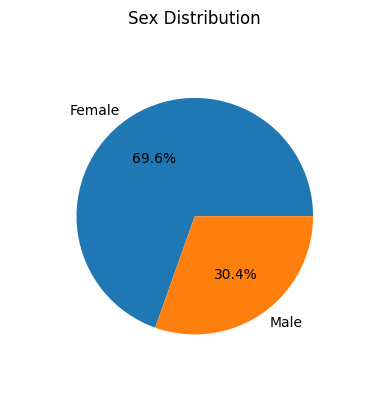

In [194]:
plt.title('Sex Distribution')
plt.pie(data['sex'].value_counts(),labels=['Female', 'Male'], autopct='%1.1f%%', radius=0.8)
plt.show()

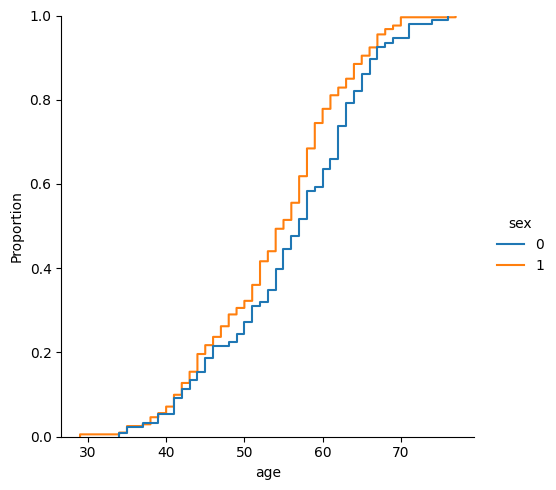

In [198]:
sns.displot(x='age',hue='sex',kind='ecdf', data=data) # 1=male 0=female

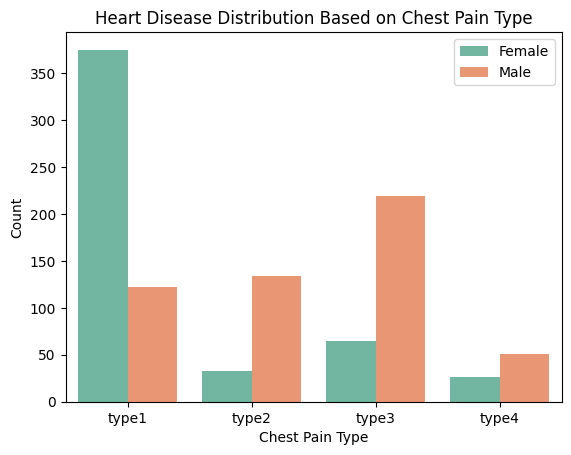

In [74]:
plt.title('Heart Disease Distribution Based on Chest Pain Type')
ax= sns.countplot(x ='cp', data=data, hue = 'target', palette = 'Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(np.arange(0, 4, 1), labels= ['type1', 'type2', 'type3', 'type4'])
plt.show()

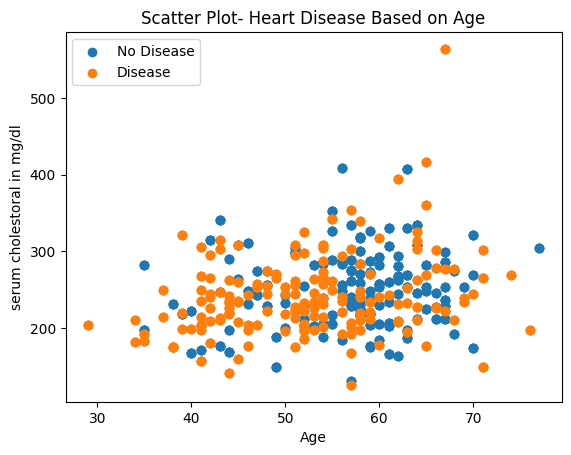

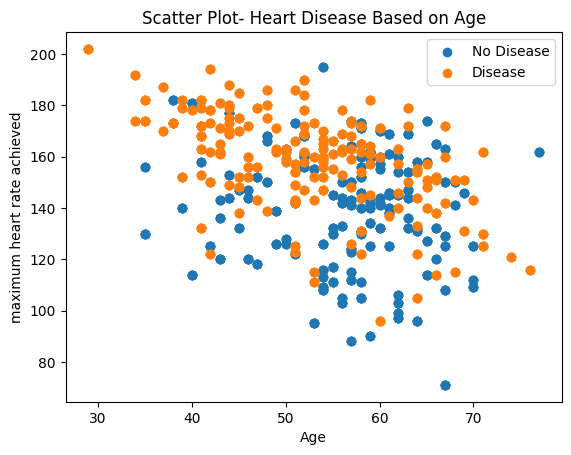

In [98]:
#valued 0 = no disease and 1 = disease.
plt.scatter(x=data.age[data.target==0], y=data.chol[(data.target==0)])
plt.scatter(x=data.age[data.target==1], y=data.chol[(data.target==1)])
plt.legend(['No Disease' , 'Disease'] )
plt.title('Scatter Plot- Heart Disease Based on Age')
plt.xlabel('Age')
plt.ylabel('serum cholestoral in mg/dl')
#slope, intercept = np.polyfit(data['age'], data['chol'], 1)
#plt.plot(data['age'], slope * data['age'] + intercept, color='black', label='Linear Regression Line')
plt.show();

plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)])
plt.legend(['No Disease' , 'Disease'] )
plt.title('Scatter Plot- Heart Disease Based on Age')
plt.xlabel('Age')
plt.ylabel('maximum heart rate achieved')
#slope, intercept = np.polyfit(data['age'], data['thalach'], 1)
#plt.plot(data['age'], slope * data['age'] + intercept, color='black', label='Linear Regression Line')
plt.show();

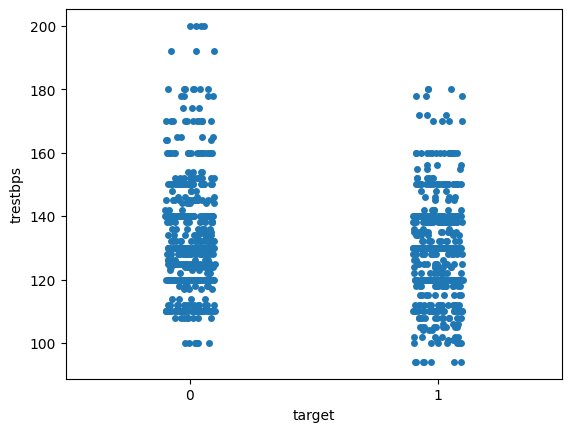

In [176]:
plt = sns.stripplot(data=data, x='target', y='trestbps')
plt.set_xticks([0, 1])
#plt.title('Compare maximum heart rate reached')

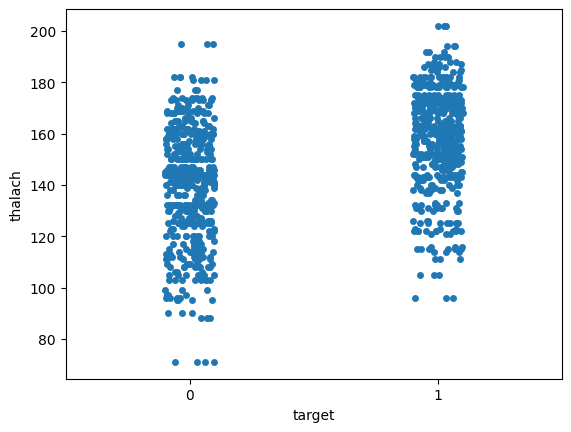

In [130]:
plt = sns.stripplot(data=data, x='target', y='thalach')
plt.set_xticks([0, 1])

<Axes: >

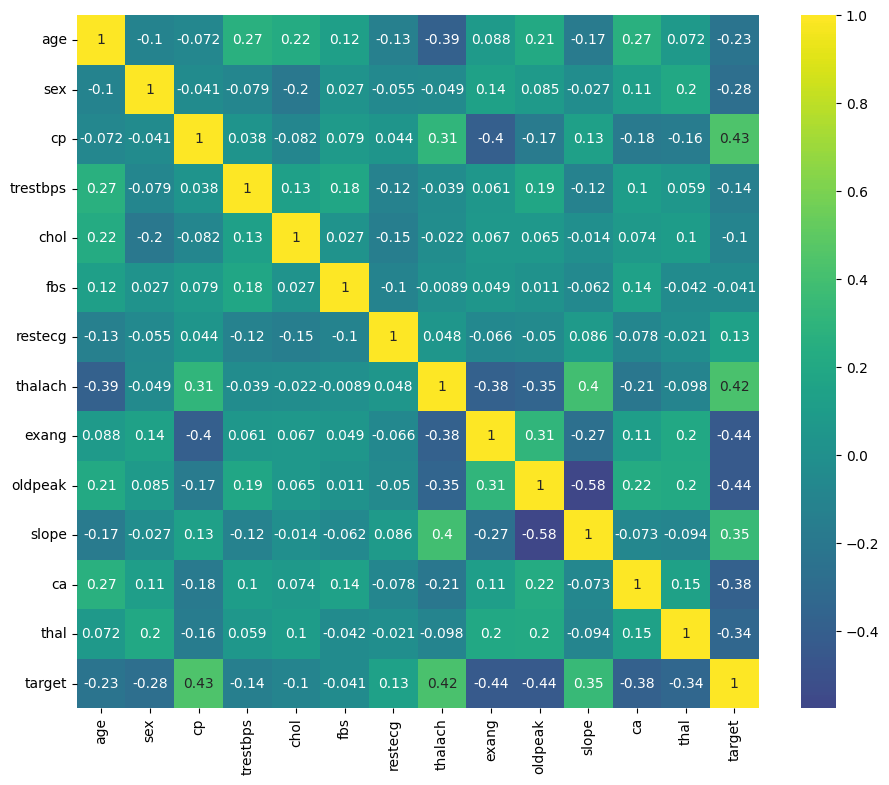

In [146]:
corr = data.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(corr, center=0, cmap='viridis', annot=True,)

In [154]:
X = data.drop(['target'],axis=1)
y = data['target']

In [155]:
X = MinMaxScaler().fit_transform(X)

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [239]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X, y, cv=kf)

In [230]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)
DTmodel_predictions = DTmodel.predict(X_test)
DTmodel_accuracy = accuracy_score(y_test, DTmodel_predictions)
DTmodel_precision = precision_score(y_test, DTmodel_predictions)
DTmodel_recall = recall_score(y_test, DTmodel_predictions)
print(f"Accuracy: {DTmodel_accuracy}")
print(f"Precision: {DTmodel_precision}")
print(f"Recall: {DTmodel_recall}")

Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767


In [240]:
print(classification_report(y_test, DTmodel_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [236]:
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, y_train)
GNBmodel_predictions = GNBmodel.predict(X_test)
GNBmodel_accuracy = accuracy_score(y_test, GNBmodel_predictions)
GNBmodel_precision = precision_score(y_test, GNBmodel_predictions)
GNBmodel_recall = recall_score(y_test, GNBmodel_predictions)
print(f"Accuracy: {GNBmodel_accuracy}")
print(f"Precision: {GNBmodel_precision}")
print(f"Recall: {GNBmodel_recall}")

Accuracy: 0.8
Precision: 0.7540983606557377
Recall: 0.8932038834951457


In [241]:
print(classification_report(y_test, GNBmodel_predictions))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [249]:
y_pred = DTmodel.predict(X_test)
y_train = DTmodel.predict(X_train)
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.9854
Model Train Accuracy : 1.0000


In this project, I chose to analyze heart disease data, including explore, visualize, preprocess data and build prediction models.  
Limitation: If the dataset contains noise, outliers, or missing values, it can negatively impact the model's accuracy and generalization.